In [1]:
# Importações necessárias
import shap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [2]:
data = load_breast_cancer() # Carregamemto da base de dados
X, y = data['data'], data['target'] # data são os parametros e target são as classes (0 ou 1, malígno ou não)

In [3]:
X # Mostrando os parametros

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [5]:
data['target_names'] # Classes

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) # Separação em teste e treinamento

In [7]:
clf = LinearSVC() # Classificador
clf.fit(X_train, y_train) # Ajuste dos parametros

LinearSVC()

In [8]:
clf.score(X_test, y_test) # 96% de acurácia

0.9649122807017544

In [9]:
explainer = shap.KernelExplainer(clf.predict, shap.kmeans(X_train, 10)) # Função que permite computar a importancia de cada caracteristica

In [10]:
shap_values = explainer.shap_values(X_test) # atribuindo os valores obtidos a uma variavel para conseguir plotar

  0%|          | 0/114 [00:00<?, ?it/s]

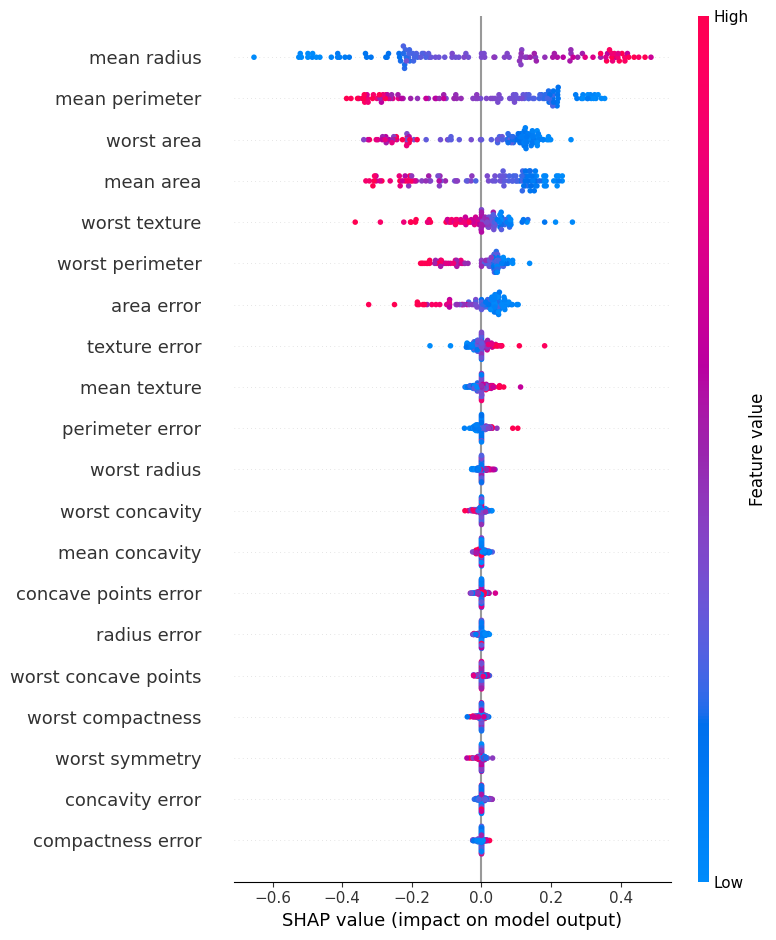

In [12]:
shap.summary_plot(shap_values, X_test, feature_names=data['feature_names']) # plotando os valores

In [14]:
shap.initjs() # Necessário para plotar
shap.force_plot(explainer.expected_value, shap_values[0], X_train[0], feature_names=data['feature_names']) # plotando como cada caracteristica impactou em casos únicos

In [15]:
mean_abs_shap_values = np.abs(shap_values).mean(axis=0) # Pega os valores das caracteristicas
mean_abs_shap_values

array([0.25803916, 0.01709238, 0.19902691, 0.14931274, 0.00548536,
       0.00603746, 0.00739132, 0.00541055, 0.00605814, 0.00557517,
       0.00706645, 0.02126145, 0.01358239, 0.05737318, 0.00525283,
       0.00641022, 0.0064953 , 0.00714697, 0.00562222, 0.00521426,
       0.00901314, 0.06409191, 0.06126007, 0.15219898, 0.005269  ,
       0.00679067, 0.00875072, 0.00706056, 0.00657417, 0.00517836])

In [20]:
features_names = data['feature_names'] # Pega os nomes das caracteristicas
features_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [17]:
feature_importance = zip(features_names, mean_abs_shap_values) # junta os valores juntos com seus nomes
dict(feature_importance) # para printar tem que converter para dicionario

{'mean radius': 0.25803916488594103,
 'mean texture': 0.01709238043463331,
 'mean perimeter': 0.19902690925089575,
 'mean area': 0.14931273563718503,
 'mean smoothness': 0.005485363050729365,
 'mean compactness': 0.006037463100183106,
 'mean concavity': 0.007391318814560993,
 'mean concave points': 0.005410553143719486,
 'mean symmetry': 0.00605814412075284,
 'mean fractal dimension': 0.005575169775390779,
 'radius error': 0.007066449468169199,
 'texture error': 0.02126145310497843,
 'perimeter error': 0.013582387736186812,
 'area error': 0.05737318020570512,
 'smoothness error': 0.005252833996157873,
 'compactness error': 0.006410217168517784,
 'concavity error': 0.006495297895653818,
 'concave points error': 0.0071469724201661325,
 'symmetry error': 0.00562221642813796,
 'fractal dimension error': 0.005214259069621111,
 'worst radius': 0.009013141190642223,
 'worst texture': 0.06409191089609834,
 'worst perimeter': 0.06126006655268751,
 'worst area': 0.15219897592273066,
 'worst smoo

In [21]:
sorted_features_importances = sorted(feature_importance, key=lambda x:x[1], reverse=True) # Ordena do maior para o menor
sorted_features_importances

[('mean radius', 0.25803916488594103),
 ('mean perimeter', 0.19902690925089575),
 ('worst area', 0.15219897592273066),
 ('mean area', 0.14931273563718503),
 ('worst texture', 0.06409191089609834),
 ('worst perimeter', 0.06126006655268751),
 ('area error', 0.05737318020570512),
 ('texture error', 0.02126145310497843),
 ('mean texture', 0.01709238043463331),
 ('perimeter error', 0.013582387736186812),
 ('worst radius', 0.009013141190642223),
 ('worst concavity', 0.008750717130112747),
 ('mean concavity', 0.007391318814560993),
 ('concave points error', 0.0071469724201661325),
 ('radius error', 0.007066449468169199),
 ('worst concave points', 0.0070605605362768255),
 ('worst compactness', 0.006790668579298491),
 ('worst symmetry', 0.006574169566193779),
 ('concavity error', 0.006495297895653818),
 ('compactness error', 0.006410217168517784),
 ('mean symmetry', 0.00605814412075284),
 ('mean compactness', 0.006037463100183106),
 ('symmetry error', 0.00562221642813796),
 ('mean fractal dimen